In [4]:
# Core imports
import kagglehub
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [11]:
# Display welcome message
print("\n Welcome to the Forest Fire Detection using Deep Learning \n")


# Download dataset
print("Downloading wildfire dataset from Kaggle...")
try:
    path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")
    base_dir = os.path.join(path, 'the_wildfire_dataset_2n_version')
    train_dir, val_dir, test_dir = [os.path.join(base_dir, folder) for folder in ['train', 'val', 'test']]

    # Validate if directories exist
    missing_dirs = [d for d in [train_dir, val_dir, test_dir] if not os.path.exists(d)]

    if missing_dirs:
        raise FileNotFoundError(f"❌ Missing dataset directories: {missing_dirs}")

    print(f"\n✅ Dataset downloaded successfully!")

    print(f"\n📂 Train: {train_dir} \n📂 Validation: {val_dir} \n📂 Test: {test_dir}")

except Exception as e:
    print(f"❌ Error downloading dataset: {e}")
    exit(1)


 Welcome to the Forest Fire Detection using Deep Learning 


✅ Dataset downloaded successfully!

📂 Train: /root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/train 
📂 Validation: /root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/val 
📂 Test: /root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/test


In [17]:
# GPU check
physical_devices = tf.config.list_physical_devices('GPU')

if physical_devices:

    try:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        print("\n✅ GPU detected and configured with memory growth")

    except RuntimeError as e:
        print(f'\n GPU configuration error: {e}')
else:
    print("\n⚠️ GPU isn't available - using CPU")


⚠️ GPU isn't available - using CPU



Dataset contains 2 classes:
1. fire (730 images)
2. nofire (1157 images)


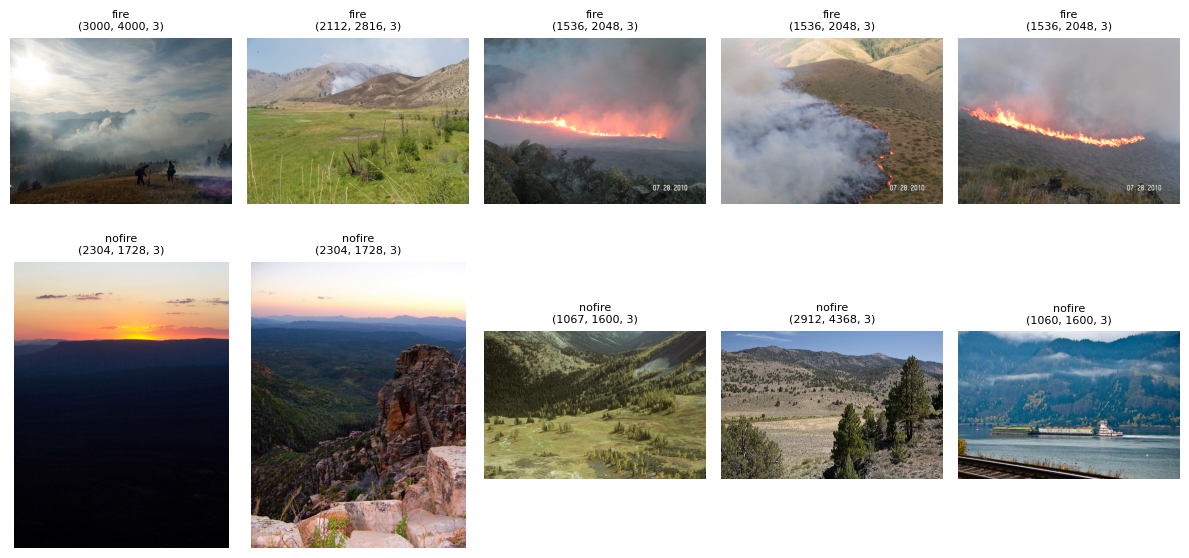

In [16]:
# Dataset exploration
classes = sorted(os.listdir(train_dir))
num_classes = len(classes)

print(f'\nDataset contains {num_classes} classes:')

for i, class_name in enumerate(classes, 1):
    class_path = os.path.join(train_dir, class_name)
    num_images = len(os.listdir(class_path))

    print(f'{i}. {class_name} ({num_images} images)')


# visualization
plt.figure(figsize=(12, 6))
for class_idx, class_name in enumerate(classes):
    class_path = os.path.join(train_dir, class_name)
    sample_images = sorted(os.listdir(class_path))[:5]

    for img_idx, img_name in enumerate(sample_images, 1):
        img_path = os.path.join(class_path, img_name)
        img = plt.imread(img_path)

        plt.subplot(num_classes, 5, class_idx*5 + img_idx)
        plt.imshow(img)
        plt.title(f'{class_name}\n{img.shape}', fontsize=8)
        plt.axis('off')

plt.tight_layout()
plt.show()